<a href="https://colab.research.google.com/github/SparkyGoLarky/SparkyGoLarky/blob/main/Tensorflow_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
m = 2
b = 0.5
x = np.linspace(0,4,100)
y = (m*x)+ b + np.random.randn(*x.shape) + 0.25
print(y)

[ 1.57948902  0.87146076  1.34152634  1.12518586  0.44510107  0.73820391
  1.39645414  0.95925241  3.41618291  1.37744342  1.11232934  3.58364575
  1.23258933  1.47025176  1.7107705   2.08048752  2.73775224  3.19243722
  3.44902385  3.13720978  2.98815468  4.1697231   5.38281279  3.11417171
  2.35163124  1.75039101  1.87694671  3.28524352  0.64703091  1.84685457
  3.28475815  3.0626836   4.54332789  1.91140232  5.0609152   3.0782539
  4.71160141  3.74396943  5.8265386   3.32680108  5.00966261  4.09109405
  4.09307577  3.34474178  4.09781695  2.4772243   4.32829887  3.83565959
  5.47197998  6.35202669  6.38099382  2.76958099  5.4352295   4.42821875
  5.68436281  4.69323026  5.54488241  4.82416686  4.18540847  5.64618043
  6.39747848  5.70448815  5.91952985  5.67055357  3.4954979   5.47767223
  6.57865206  6.08782461  7.09066232  6.02822847  6.3333096   5.62849576
  7.72856834  7.69292847  6.91452525  6.81509447  6.93778634  6.46801594
  5.93970363  7.95919696  8.88436058  6.82337443  8.

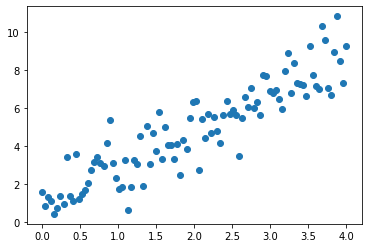

In [5]:
plt.scatter(x,y)
plt.show()

In [6]:
class Model:
  def __init__(self):
    self.weight = tf.Variable(10.0)
    self.bias = tf.Variable(10.0)
  def __call__(self, x):
    return (self.weight * x) + self.bias

In [7]:
def calculate_loss(y_actual, y_expected):
  return tf.reduce_mean(tf.square(y_actual - y_expected))

In [8]:
def train(model, x, y_expected, learning_rate):
  with tf.GradientTape() as gt:
    y_output = model(x)
    loss = calculate_loss(y_output, y_expected)
  new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
  model.weight.assign_sub(new_weight * learning_rate)
  model.bias.assign_sub(new_bias * learning_rate)

Epoch: 0, Loss: 722.278076171875
Epoch: 1, Loss: 512.9805297851562
Epoch: 2, Loss: 364.59637451171875
Epoch: 3, Loss: 259.3750915527344
Epoch: 4, Loss: 184.74151611328125
Epoch: 5, Loss: 131.78663635253906
Epoch: 6, Loss: 94.1985855102539
Epoch: 7, Loss: 67.50517272949219
Epoch: 8, Loss: 48.53731918334961
Epoch: 9, Loss: 35.04933166503906
Epoch: 10, Loss: 25.449548721313477
Epoch: 11, Loss: 18.609699249267578
Epoch: 12, Loss: 13.729896545410156
Epoch: 13, Loss: 10.242905616760254
Epoch: 14, Loss: 7.7463836669921875
Epoch: 15, Loss: 5.954835414886475
Epoch: 16, Loss: 4.665609359741211
Epoch: 17, Loss: 3.7347841262817383
Epoch: 18, Loss: 3.0600829124450684
Epoch: 19, Loss: 2.5687735080718994
Epoch: 20, Loss: 2.2090845108032227
Epoch: 21, Loss: 1.9441251754760742
Epoch: 22, Loss: 1.7475732564926147
Epoch: 23, Loss: 1.6006158590316772
Epoch: 24, Loss: 1.4897805452346802
Epoch: 25, Loss: 1.405397891998291
Epoch: 26, Loss: 1.3405070304870605
Epoch: 27, Loss: 1.2900804281234741
Epoch: 28, Los

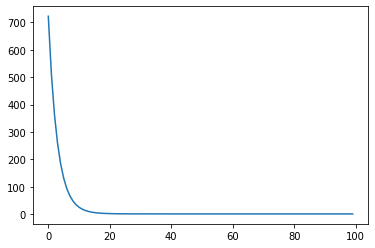

In [9]:
model = Model()
epochs = 100
learning_rate = 0.15
current_epochs = []
losses = []
for epoch in range(epochs):
  y_output = model(x)
  loss = calculate_loss(y_output, y)
  print(f"Epoch: {epoch}, Loss: {loss.numpy()}")
  current_epochs.append(epoch)
  losses.append(loss)
  train(model, x, y, learning_rate)
plt.plot(current_epochs, losses)
plt.show()

In [10]:
new_m = model.weight.numpy()
new_b = model.bias.numpy()
print(new_m)
print(new_b)

1.9282378
0.99249256


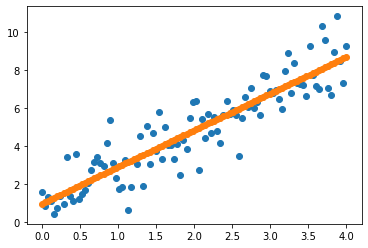

In [11]:
new_y = (new_m * x) + new_b
plt.scatter(x,y)
plt.scatter(x,new_y)
plt.show()